In [35]:
import pandas as pd
import pymongo
import json
import seaborn as sns
import datetime as dt
import ipywidgets as widgets
import cache_magic
import geopandas as gpd
import matplotlib.pyplot as plt
import re
import io
import requests

In [2]:
def get_data():
    
    with open("local/pass.json") as file:
        file = json.loads(file.read())
        connection_string = file.get('connection_string')
        client = pymongo.MongoClient(
            connection_string)
        db = client["femicide"]
        df = pd.DataFrame(db['master'].find())
        
    return df

In [3]:
sns.set_style("darkgrid")

In [4]:
#df = get_data()
df = pd.read_csv('test.csv')
df['year'] = pd.to_datetime(df['year'], format='%Y-%m-%d')
df

,iso3,year,continent,region,country,fem_pop,femicide_count,femicide_rate,suicide_count,suicide_rate,gnipc,gini,mat_deaths
0,ABW,1990-01-01,America,Caribbean,Aruba,33480.0,0.0,0.000000,NaN,NaN,11570.0,NaN,NaN
1,ABW,1991-01-01,America,Caribbean,Aruba,34657.0,NaN,NaN,NaN,NaN,12560.0,NaN,NaN
2,ABW,1992-01-01,America,Caribbean,Aruba,35941.0,NaN,NaN,NaN,NaN,13610.0,NaN,NaN
3,ABW,1993-01-01,America,Caribbean,Aruba,37137.0,NaN,NaN,NaN,NaN,14640.0,NaN,NaN
4,ABW,1994-01-01,America,Caribbean,Aruba,38437.0,NaN,NaN,NaN,NaN,16060.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7175,ZWE,2018-01-01,Africa,Eastern Africa,Zimbabwe,7966181.0,163.0,2.046150,693.0,8.7,1550.0,NaN,1700.0
7176,ZWE,2019-01-01,Africa,Eastern Africa,Zimbabwe,8122618.0,167.0,2.055987,715.0,8.8,1450.0,50.3,1900.0
7177,ZWE,2020-01-01,Africa,Eastern Africa,Zimbabwe,8284447.0,146.0,1.762339,NaN,NaN,1460.0,NaN,1700.0
7178,ZWE,2021-01-01,Africa,Eastern Africa,Zimbabwe,8449834.0,158.0,1.869859,NaN,NaN,1530.0,NaN,NaN


## Descriptive statistics

In [5]:
df.describe()

,fem_pop,femicide_count,femicide_rate,suicide_count,suicide_rate,gnipc,gini,mat_deaths
count,7.128000e+03,2598.000000,2564.000000,3660.000000,3660.000000,6053.000000,1826.000000,3885.000000
mean,1.523767e+07,476.770593,2.367748,1298.661202,5.055902,11118.818768,37.953012,1929.494723
std,6.017959e+07,1860.158809,2.707486,7202.703613,4.035601,17052.591994,8.840724,7595.224175
min,4.579000e+03,0.000000,0.000000,0.000000,0.000000,40.000000,20.700000,0.000000
25%,3.187610e+05,9.000000,0.677045,43.000000,2.300000,1070.000000,31.225000,7.000000
50%,2.706933e+06,38.000000,1.338884,182.500000,4.000000,3680.000000,35.850000,82.000000
75%,9.542442e+06,156.000000,3.015460,511.250000,6.600000,13340.000000,43.275000,1000.000000
max,6.915285e+08,18731.000000,24.878716,90711.000000,39.500000,125240.000000,65.800000,110000.000000


## Trending

In [6]:
variable=widgets.Dropdown(
        options=df.columns[5:-1],
        value='femicide_rate',
        description='Variable:',
        disabled=False)

display(variable)

country=widgets.Dropdown(
        options=df['country'].unique(),
        value='Aruba',
        description='Country:',
        disabled=False)

display(country)

Dropdown(description='Variable:', index=2, options=('fem_pop', 'femicide_count', 'femicide_rate', 'suicide_cou…

Dropdown(description='Country:', options=('Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Albania', 'Andorra', …

<Axes: xlabel='year', ylabel='femicide_rate'>

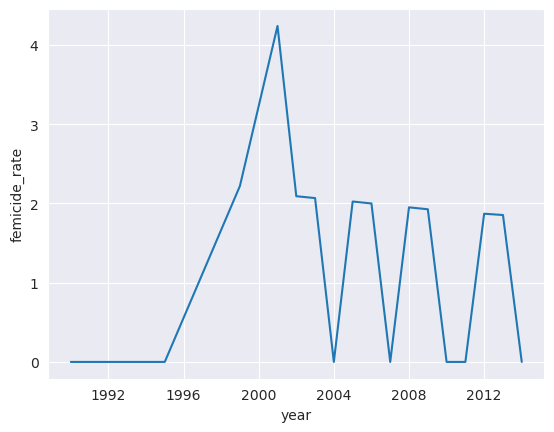

In [7]:
df_trend = df[df['country'] == country.value]
df_trend = df_trend[['year', variable.value]]
sns.lineplot(data=df_trend, x='year', y=variable.value)

### Mean Global Femicide Count over time

<Axes: xlabel='year', ylabel='femicide_count'>

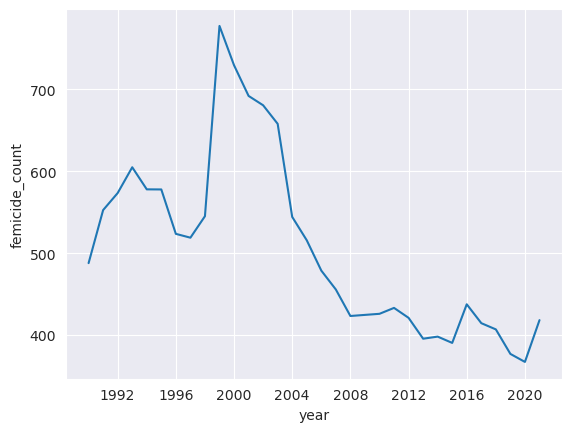

In [8]:
df_fem_mean = df.groupby('year')['femicide_count'].mean()
sns.lineplot(data=df_fem_mean)

### Mean Global Femicide Rate over time

<Axes: xlabel='year', ylabel='femicide_rate'>

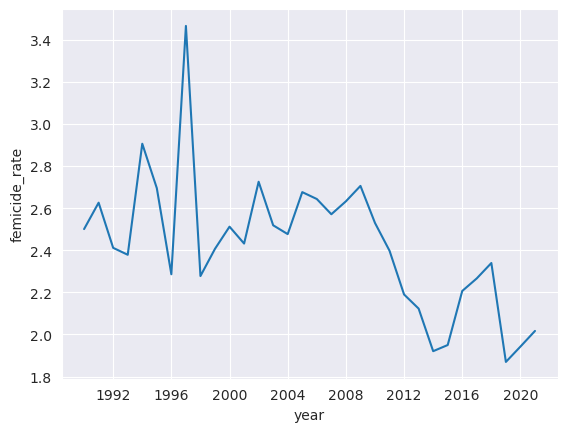

In [9]:
df_fem_mean = df.groupby('year')['femicide_rate'].mean()
sns.lineplot(data=df_fem_mean)

### Median Global Femicide Count over time

<Axes: xlabel='year', ylabel='femicide_count'>

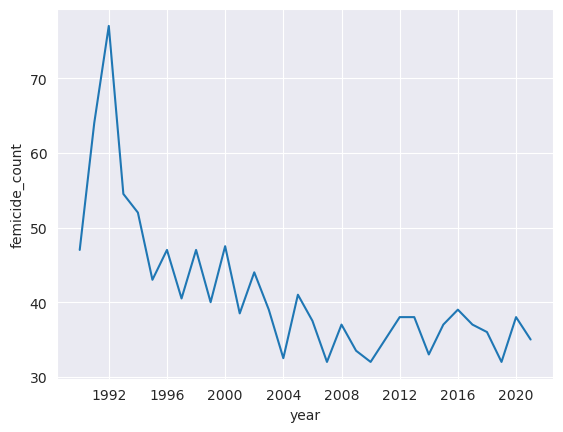

In [10]:
df_fem_median = df.groupby('year')['femicide_count'].median()
sns.lineplot(data=df_fem_median)

### Median Global Femicide Rate over time

<Axes: xlabel='year', ylabel='femicide_rate'>

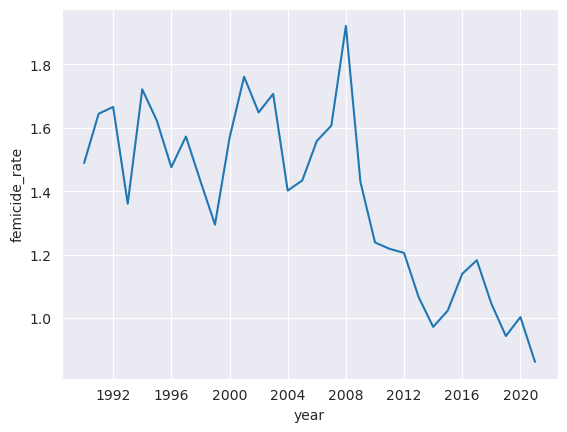

In [11]:
df_fem_median = df.groupby('year')['femicide_rate'].median()
sns.lineplot(data=df_fem_median)

### Sum of Global Femicide Count over time

<Axes: xlabel='year', ylabel='femicide_count'>

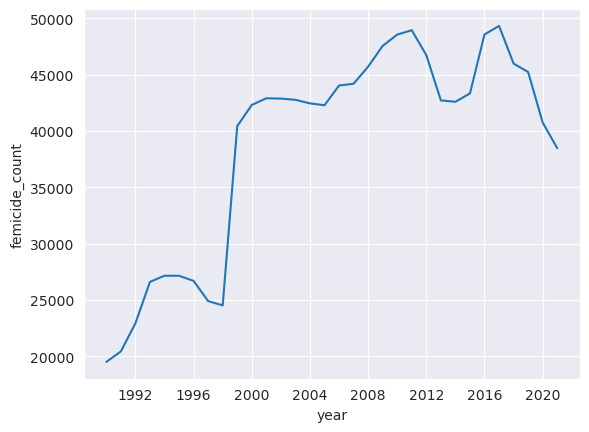

In [12]:
df_fem_sum = df.groupby('year')['femicide_count'].sum()
df_fem_sum = df_fem_sum[0:-1]
sns.lineplot(data=df_fem_sum)

### Sum of Global Suicide Count over time

<Axes: xlabel='year', ylabel='suicide_count'>

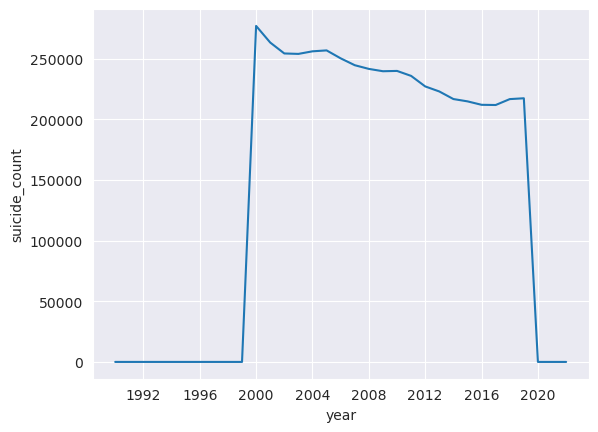

In [13]:
df_suic_sum = df.groupby('year')['suicide_count'].sum()
sns.lineplot(data=df_suic_sum)

### Histogram of years in dataset

<Axes: xlabel='year', ylabel='Count'>

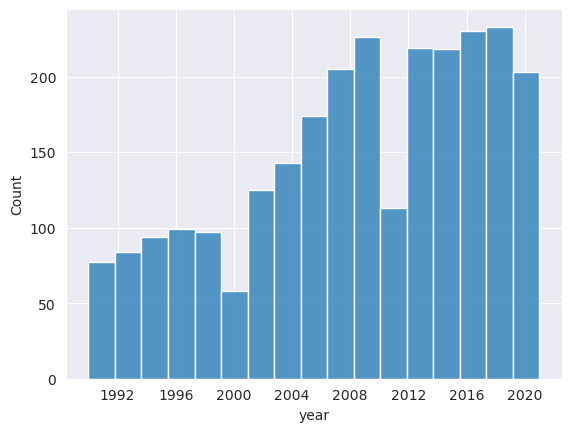

In [14]:
df_hist = df.dropna(subset='femicide_count')
sns.histplot(data=df_hist['year'])

In [15]:
df[df['iso3'].str.contains('PAK')]

,iso3,year,continent,region,country,fem_pop,femicide_count,femicide_rate,suicide_count,suicide_rate,gnipc,gini,mat_deaths
4955,PAK,1990-01-01,Asia,Southern Asia,Pakistan,55569854.0,NaN,NaN,NaN,NaN,370.0,33.2,NaN
4956,PAK,1991-01-01,Asia,Southern Asia,Pakistan,57435675.0,NaN,NaN,NaN,NaN,370.0,NaN,NaN
4957,PAK,1992-01-01,Asia,Southern Asia,Pakistan,58986038.0,NaN,NaN,NaN,NaN,400.0,NaN,NaN
4958,PAK,1993-01-01,Asia,Southern Asia,Pakistan,60526987.0,NaN,NaN,NaN,NaN,410.0,NaN,NaN
4959,PAK,1994-01-01,Asia,Southern Asia,Pakistan,62325262.0,NaN,NaN,NaN,NaN,410.0,NaN,NaN
4960,PAK,1995-01-01,Asia,Southern Asia,Pakistan,64211200.0,NaN,NaN,NaN,NaN,440.0,NaN,NaN
4961,PAK,1996-01-01,Asia,Southern Asia,Pakistan,66221856.0,NaN,NaN,NaN,NaN,450.0,28.7,NaN
4962,PAK,1997-01-01,Asia,Southern Asia,Pakistan,68225605.0,NaN,NaN,NaN,NaN,440.0,NaN,NaN
4963,PAK,1998-01-01,Asia,Southern Asia,Pakistan,70258836.0,NaN,NaN,NaN,NaN,410.0,33.1,NaN
4964,PAK,1999-01-01,Asia,Southern Asia,Pakistan,72328261.0,NaN,NaN,NaN,NaN,410.0,NaN,NaN


## Mapping 

In [16]:
def plot_global(df, year, column, shapes):
    
    df_fem_map = df.copy()
    df_fem_map = df_fem_map[df_fem_map['year'].dt.year == year.value]
    df_fem_map = df_fem_map.merge(shapes, on='iso3', how='left')
    df_fem_map = df_fem_map.dropna(subset='geometry')
    gdf = gpd.GeoDataFrame(df_fem_map, geometry='geometry', crs="EPSG:4326")
    
    fig , ax = plt.subplots(figsize=(24, 17))
    gdf.plot(column=column.value, ax=ax)
    ax.set_title(str(year.value) + ' Global ' + re.sub(r'_', ' ', column.value).capitalize())
    plt.xticks([])
    plt.yticks([])
    
    return fig
    

In [17]:
shapes = gpd.read_file('/vsicurl/https://github.com/Tom-Whittington/Femicide_analysis/raw/main/county_shapes/WB_countries_Admin0_10m.shp')
shapes = shapes[['ISO_A3', 'geometry']]
shapes = shapes.rename(columns={ 'ISO_A3' : 'iso3'})

year = widgets.IntSlider(min=1990,
                  max=2023,
                 continuous_update=True)
display(year)

column=widgets.Dropdown(
        options=df.columns[5:-1],
        value='femicide_rate',
        description='Column:',
        disabled=False)

display(column)

IntSlider(value=1990, max=2023, min=1990)

Dropdown(description='Column:', index=2, options=('fem_pop', 'femicide_count', 'femicide_rate', 'suicide_count…

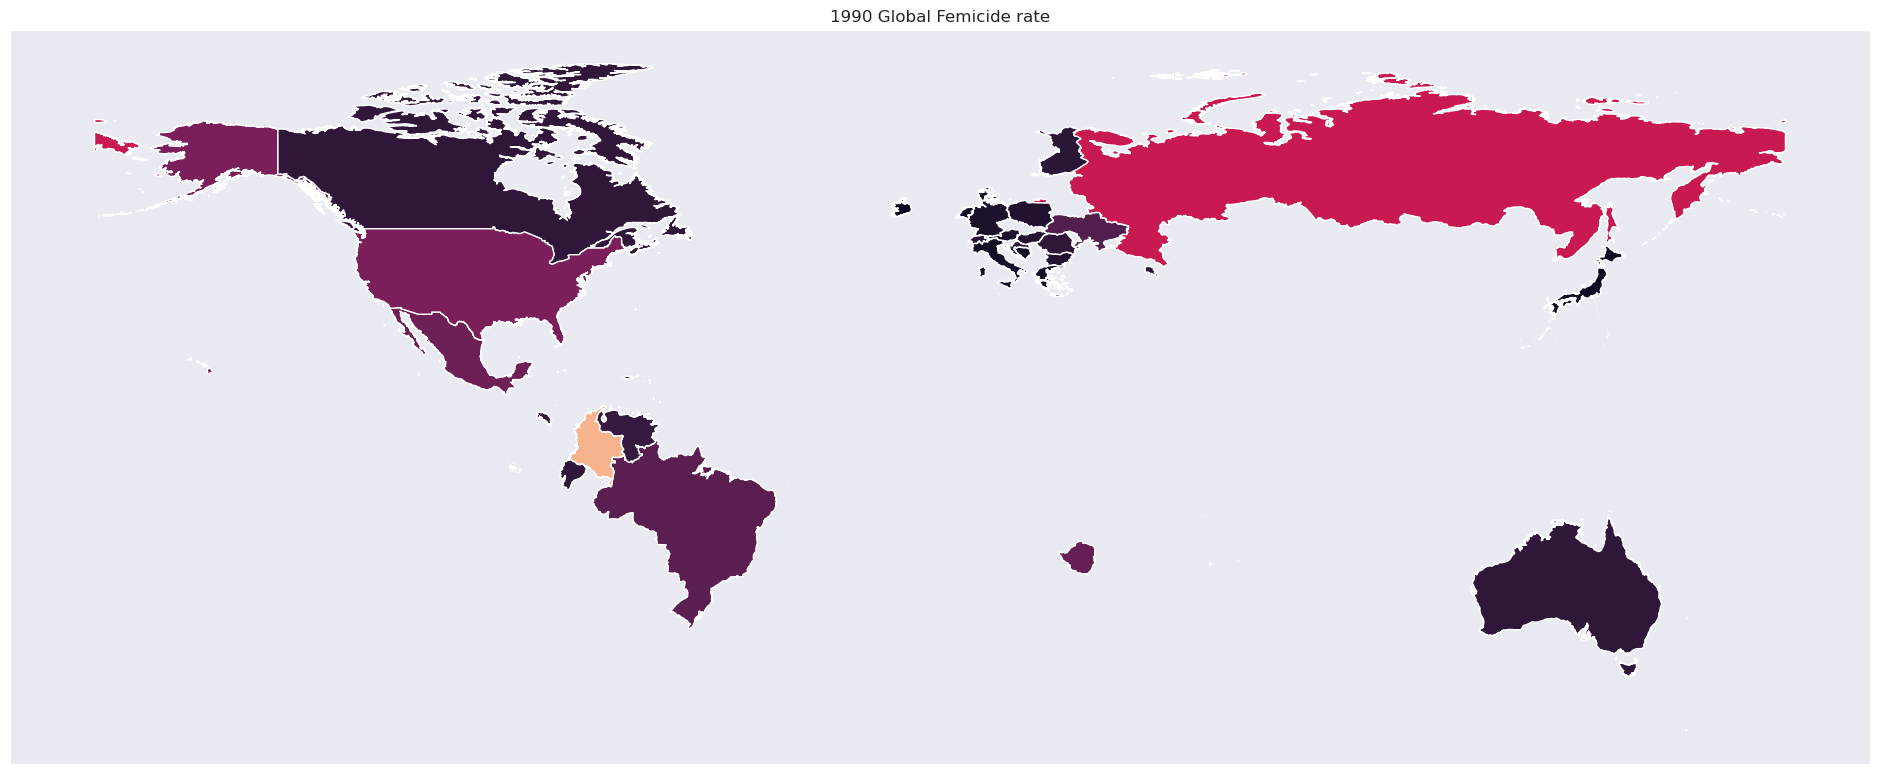

In [18]:
fig = plot_global(df, year, column, shapes)

In [40]:
#url = 'https://github.com/Tom-Whittington/Femicide_analysis/raw/main/county_shapes/WB_countries_Admin0_10m.shp'
#download = requests.get(url).content
shapes = gpd.read_file('country_shapes.geojson')
shapes = shapes[['iso3', 'geometry']]
shapes.plot)

,iso3,geometry
0,ASM,"POLYGON ((-170.74390 -14.37556, -170.74942 -14..."
1,BTN,"POLYGON ((92.08151 26.86905, 92.06443 26.85972..."
2,COG,"POLYGON ((15.89050 -3.94301, 15.88028 -3.95111..."
3,COL,"MULTIPOLYGON (((-81.71306 12.49028, -81.72014 ..."
4,CAF,"POLYGON ((20.45330 4.52379, 20.45798 4.61931, ..."
...,...,...
247,MLT,"POLYGON ((14.51972 35.80000, 14.42389 35.81860..."
248,NFK,"POLYGON ((167.96497 -29.08111, 167.92358 -29.0..."
249,ARE,"MULTIPOLYGON (((56.28047 24.85727, 56.26944 24..."
250,TUV,"MULTIPOLYGON (((177.29025 -6.11444, 177.28137 ..."


In [31]:
shapes = pd.read_csv('https://github.com/Tom-Whittington/Femicide_analysis/raw/main/county_shapes/WB_countries_Admin0_10m.shp')
shapes.duplicates(subset='iso3')

loading cached value for variable 'download'. Time since pickling  185 days, 18:13:29.735424


,Region,Subregion,country,iso3_code,Indicator,Disaggregation,Gender,Source,Unit,Year,Value,Footnote
0,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Total (all ages),NSO,Count,2009,1115,NaN
1,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Total (all ages),NSO,"Rate per 100,000 population",2009,3.93,NaN
2,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Total (all ages),NSO,Count,2010,983,NaN
3,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Total (all ages),NSO,"Rate per 100,000 population",2010,3.37,NaN
4,Asia,Southern Asia,Afghanistan,AFG,Homicide: # of victims,-,Total (all ages),NSO,Count,2011,1231,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
24387,Africa,Sub-Saharan Africa,Zimbabwe,ZWE,Homicide: # of victims,-,Total (all ages),WHO,"Rate per 100,000 population",2006,8.82,NaN
24388,Africa,Sub-Saharan Africa,Zimbabwe,ZWE,Homicide: # of victims,-,Total (all ages),WHO,Count,2010,711,NaN
24389,Africa,Sub-Saharan Africa,Zimbabwe,ZWE,Homicide: # of victims,-,Total (all ages),WHO,"Rate per 100,000 population",2010,5.6,NaN
24390,Africa,Sub-Saharan Africa,Zimbabwe,ZWE,Homicide: # of victims,-,Total (all ages),WHO,Count,2012,981,NaN


([], [])

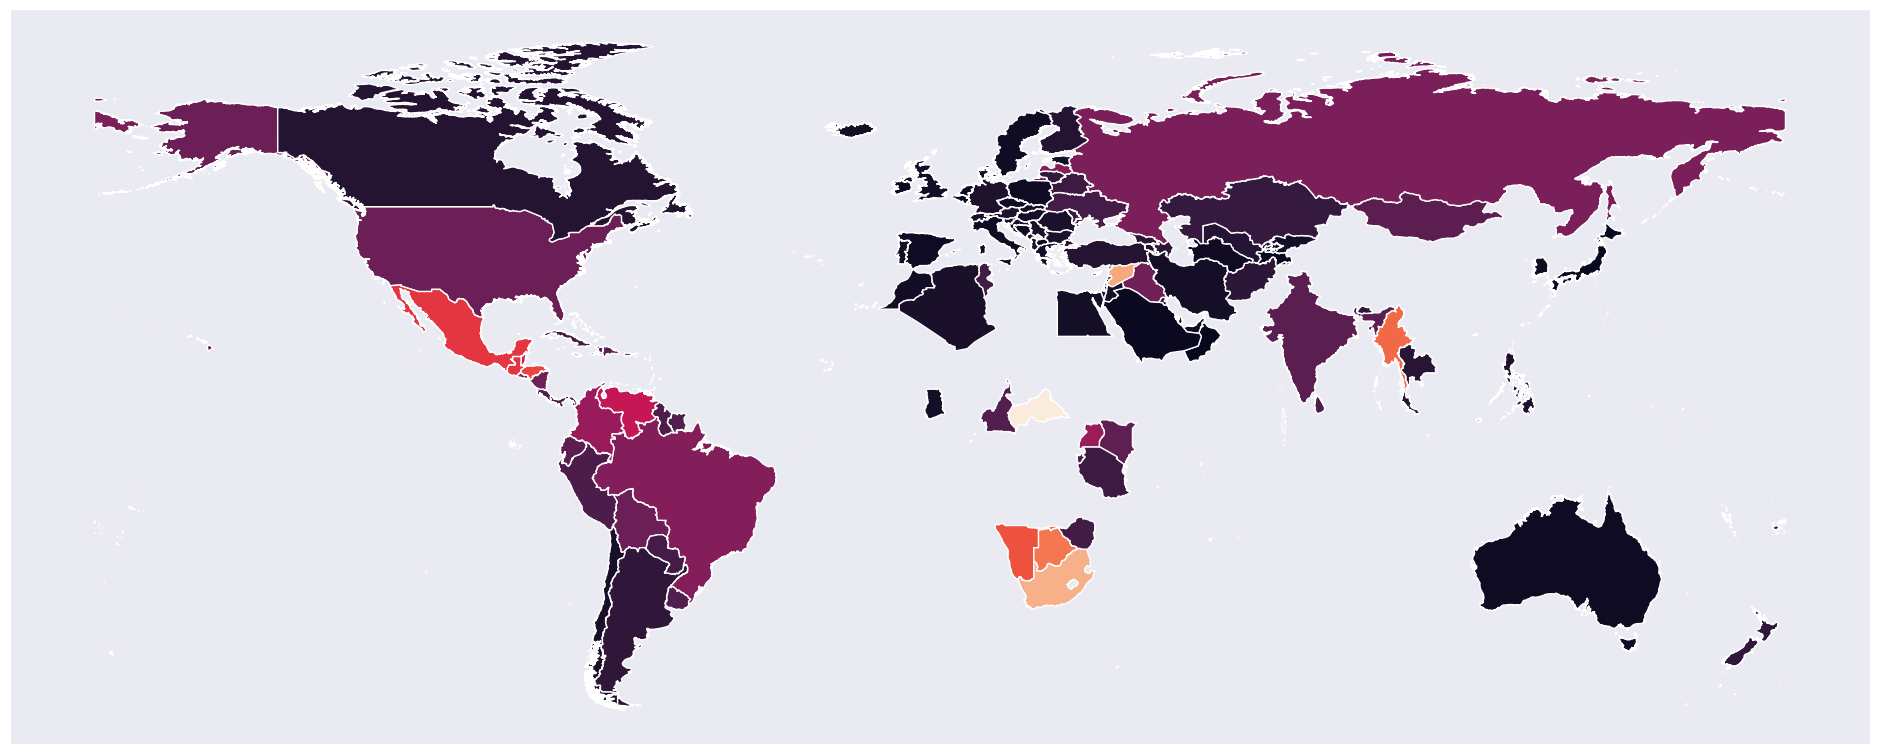

In [19]:
df= df.dropna(subset='femicide_rate')

df = df.sort_values('year').groupby('country').tail(1)

df_fem_map = df.merge(shapes, on='iso3', how='right')
#df_fem_map = df_fem_map.dropna(subset='geometry')
gdf = gpd.GeoDataFrame(df_fem_map, geometry='geometry', crs="EPSG:4326")

fig , ax = plt.subplots(figsize=(24, 17))
gdf.plot(column='femicide_rate', ax=ax)
#ax.set_title(str(year.value) + ' Global ' + re.sub(r'_', ' ', column.value).capitalize())
plt.xticks([])
plt.yticks([])
    
    

## Decade analysis

In [20]:
df_dec = df.copy()
df_dec=df_dec.set_index('year')
df_dec = df_dec.groupby(['iso3', ((df_dec.index.year//10)*10)]).mean(numeric_only=True)
df_dec.index = df_dec.index.rename({'year' : 'decade'})

### Femicide Rate Change over decades

In [21]:
df_fem_dec = df_dec.copy()
df_fem_dec = df_fem_dec['femicide_rate'].reset_index()
countries = df_fem_dec['iso3'].unique()
df_whole = pd.DataFrame()
#df_fem_dec['femicide_rate_diff'] = df_fem_dec.diff()
df_fem_dec['diff']=df_fem_dec['femicide_rate'].diff()
df_fem_dec

,iso3,decade,femicide_rate,diff
0,ABW,2010,0.000000,NaN
1,AFG,2010,1.274152,1.274152
2,ALB,2020,0.839892,-0.434260
3,AND,2010,0.000000,-0.839892
4,ARE,2020,0.350495,0.350495
...,...,...,...,...
151,VUT,2020,0.645567,-3.007234
152,WSM,2010,0.974635,0.329068
153,XKX,2020,0.955044,-0.019591
154,ZAF,2010,9.019681,8.064637
